## Coding Practice #0504

### 1. Convolutional Neural Network with Keras (color images):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings                   
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data:

More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Bring in the data.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170500096/170498071 [==============================] - 13s 0us/step


In [3]:
# View the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


#### 1.2. Visualize the data:

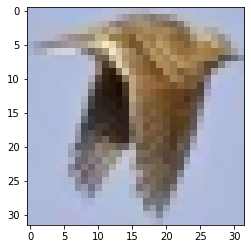

In [4]:
i_image = 123                                   # You may change this at will. 
plt.imshow(X_train[i_image,:,:])
plt.show()

#### 1.3. Prepare the data:

In [0]:
# Scaling.
X_train = X_train/255                   
X_test = X_test/255                        

In [0]:
# Reshaping.
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [0]:
# One-hot-encoding.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define a CNN model:

In [8]:
drop_prob = 0.7
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(5,5),padding='same',activation="relu"))        # 3 channels of color.
my_model.add(MaxPooling2D(pool_size=2))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob))
# Output layer.
my_model.add(Dense(units = 10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# View the summary.
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4195328   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

#### 1.5. Define the hyperparameters and optimizer:

In [0]:
# Hyperparameters.
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [0]:
# Define the optimizer and then compile.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [12]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.3, verbose = 1)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 16s 470us/sample - loss: 1.7197 - acc: 0.3766 - val_loss: 1.4267 - val_acc: 0.4993
Epoch 2/20
35000/35000 [==============================] - 9s 268us/sample - loss: 1.3884 - acc: 0.5069 - val_loss: 1.2691 - val_acc: 0.5499
Epoch 3/20
35000/35000 [==============================] - 10s 276us/sample - loss: 1.2434 - acc: 0.5591 - val_loss: 1.1494 - val_acc: 0.6031
Epoch 4/20
35000/35000 [==============================] - 9s 270us/sample - loss: 1.1460 - acc: 0.5952 - val_loss: 1.0918 - val_acc: 0.6208
Epoch 5/20
35000/35000 [==============================] - 9s 265us/sample - loss: 1.0678 - acc: 0.6264 - val_loss: 1.0575 - val_acc: 0.6328
Epoch 6/20
35000/35000 [==============================] - 9s 271us/sample - loss: 1.0054 - acc: 0.6466 - val_loss: 0.9869 - val_acc: 0.6610
Epoch 7/20
35000/35000 [==============================] - 9s 267us/sample - loss: 0.9497 - acc: 0.6676 - val

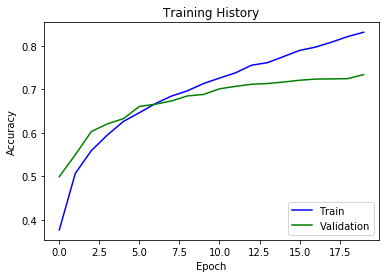

In [13]:
# Visualize the training history. 
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['acc'][n_skip:], c="b")
plt.plot(my_summary.history['val_acc'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing: 

In [14]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.722000002861023
